# Veriye İlk Bakış - Veri Setinin Yapısının İncelenmesi 

In [50]:
import seaborn as sns
planets = sns. load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [51]:
df = planets.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [52]:
import pandas as pd
df.method = pd.Categorical(df.method)
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

# Veri Setinin Betimlenmesi 

In [54]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [55]:
df.shape

(1035, 6)

In [56]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [57]:
# Veri setini analizlere, görselleştirmelere sokmadan önce verileri anlamamız, değişkenleri incelememiz lazım. Bu tabloyu yorumladık.

df.describe().T     # describe, kategorik değişkenleri dışarıda bırakır(Yani buradaki tüm değerler sayısaldır.) ve eksik verileri göz ardı eder(dropna).

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [58]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.0,NaN,NaN,NaN,1.785507,1.240976,1.0,1.0,1.0,2.0,7.0
orbital_period,992.0,NaN,NaN,NaN,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,NaN,NaN,NaN,2.638161,3.818617,0.0036,0.229,1.26,3.04,25.0
distance,808.0,NaN,NaN,NaN,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0
year,1035.0,NaN,NaN,NaN,2009.070531,3.972567,1989.0,2007.0,2010.0,2012.0,2014.0


# Eksik Değerlerin İncelenmesi 

In [60]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [61]:
# Hiç eksik gözlem(değer) var mı?
df.isnull().values.any()

True

In [62]:
# Hangi değişkenlerde toplamda kaçar tane eksik var?
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [63]:
# orbital_period'daki eksik değerler yerine 0 değerini verdik.
df["orbital_period"].fillna(0 , inplace=True)
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [64]:
# mass'daki eksik değerler yerine mass'ın ortalama değerini verdik.
df["mass"].fillna(df.mass.mean() , inplace=True)
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

# Kategorik Değişken Özetleri 


In [66]:
import seaborn as sns
planets = sns.load_dataset("planets")
df= planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [67]:
# Sadece Kategorik Değişkenleri Yazdırma Ve Özetleri

kat_df = df.select_dtypes(include=[object])      # başta olduğu gibi "category" olarak değiştirdiysek daha önce ["category"] yazmamız gerekir.
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [68]:
# Kategorik Değişkenin Sınıflarına (İsimlerine) Erişim
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [69]:
# Kategorik Değişkenin Sınıf Sayısına Erişim
kat_df["method"].value_counts().count()

10

In [70]:
# Kategorik Değişkenlerinin Sınıflarının Frekanslarına(hangisinden kaçar tane) Erişim
kat_df["method"].value_counts()

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

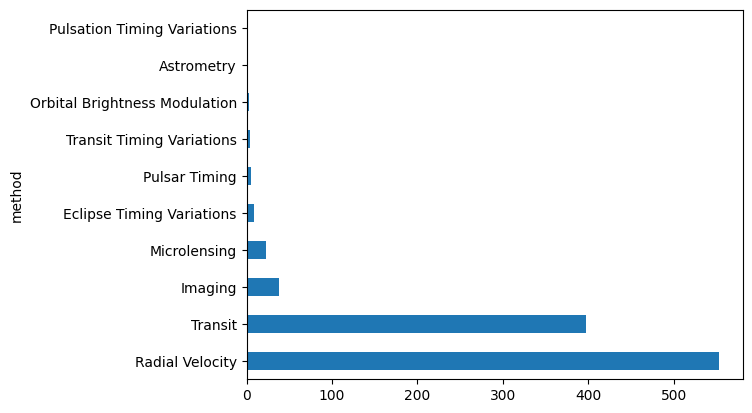

In [71]:
# Üstteki bilgiyi görselleştirdik.
import matplotlib.pyplot as plt
df["method"].value_counts().plot.barh()
plt.show()

# Sürekli (Sayısal) Değişken Özetleri

In [73]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [74]:
# Sadece sayısal değişkenleri seçtik.
num_df = df.select_dtypes(include=["float64" , "int64"])
num_df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [75]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [76]:
# Sadece belirli bir değişkenin de istatistiklerine bakabiliriz.
num_df["distance"].describe().T

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [77]:
# Sayısal değişkenler için özet istatistikler
print("ortalama:" , str(num_df["distance"].mean()))
print("distance'in dolu değer sayısı:" , str(num_df["distance"].count()))
print("distance'in max değeri:" , str(num_df["distance"].max()))
print("distance'in min değeri:" , str(num_df["distance"].min()))
print("Medyan:" , str(num_df["distance"].median()))
print("Standart Sapması:" , str(num_df["distance"].std()))

ortalama: 264.06928217821786
distance'in dolu değer sayısı: 808
distance'in max değeri: 8500.0
distance'in min değeri: 1.35
Medyan: 55.25
Standart Sapması: 733.1164929404421


# Veri Seti Hikayesi

In [79]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [80]:
# Elimize bilmediğimiz bir veri seti geldiğinde yapacağımız ilk iki iş bu tabloları inceleyerek fikir sahibi olmak.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [81]:
# Elimize bilmediğimiz bir veri seti geldiğinde yapacağımız ilk iki iş bu tabloları inceleyerek fikir sahibi olmak.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [82]:
# Kategorik değişkenklerimizi inceleyeceğiz.
df["cut"].value_counts()


cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [83]:
# Kategorik değişkenklerimizi inceleyeceğiz.
df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [85]:
# Kategorik değişkenklerimizi inceleyeceğiz.
df["clarity"].value_counts()


clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [89]:
# Kategorik değişkenlerimiz ordered(sıralı) olduğu için (iyiden kötüye -> ideal premium ... good) bunu python'a belirtmemiz gerkiyor.
# Ordinal (Sıralı) tanımlama:
from pandas.api.types import CategoricalDtype
df.cut = df.cut.astype(CategoricalDtype(ordered=True))
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [90]:
df.cut.head(1)      # DİKKAT !!!!!! Burada çıktı veren kalite sıralaması doğru değil

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [91]:
# Bu kalite sıralamasını doğru yapmanın yolu:
cut_kategoriler = ["Fair" , "Good" , "Very Good" , "Premium" , "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(ordered=True , categories=cut_kategoriler))
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

# Sütun Grafiğin Oluşturulması 


- catplot: Kategorik değişkenlerin ilişkilerini görselleştirmek için kullanılır. Örneğin, kategorik bir değişkenin farklı değerlerine sahip veri noktalarının dağılımını veya ilişkisini göstermek için kullanılabilir.

- barplot:  Kategorik değişkenlerin sayısal değerlerini göstermek için kullanılır. Her bir kategori için bir çubuk çizerek, kategoriler arasındaki ilişkiyi veya dağılımı görselleştirebilirsiniz. Örneğin, bir ürünün farklı bölgelerdeki satışlarını göstermek için barplot kullanabilirsiniz.

- distplot: Bir değişkenin dağılımını görselleştirmek için kullanılır. Veri noktalarının yoğunluk tahminlerini (genellikle histogram olarak) ve/veya veri noktalarının çizgi grafiğini görüntüler. Bu sayede verinin merkezi eğilimi, yayılımı ve simetrisi hakkında bilgi edinmek için kullanılabilir.

- kdeplot:  Yoğunluk tabanlı veri görselleştirmeleri için kullanılır. Veri noktalarının yoğunluk tahminini göstermek için çekirdek yoğunluk tahminini kullanır. Bu yöntem, veri noktalarının dağılımını düzgün bir şekilde gösterir ve gürültüyü azaltır. kdeplot, bir değişkenin dağılımını görselleştirmek veya iki değişken arasındaki ilişkiyi anlamak için kullanılabilir.


<Axes: ylabel='cut'>

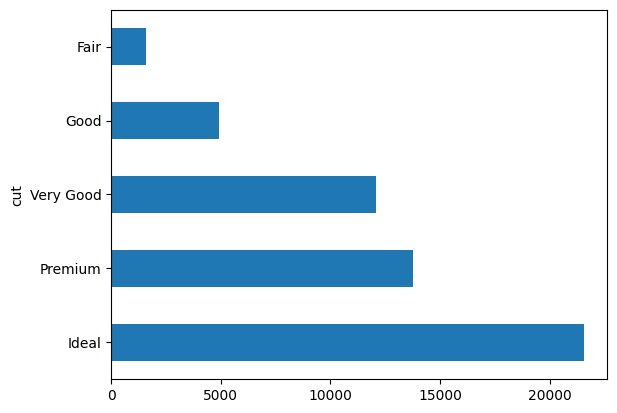

In [93]:
# Sütun Grafik, kategorik değişkenleri göreslleştirmek için kullanılır. -> barplot()
df["cut"].value_counts().plot.barh()

Text(0.5, 1.0, 'Cut Değişkeninin Sınıf Frekansları')

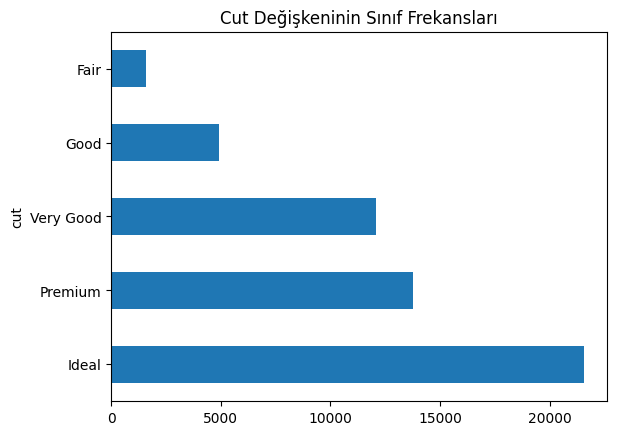

In [95]:
# Grafiğimize başlık ekledik. -> set_title()
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları")


Text(0.5, 1.0, 'Cut Değişkeninin Sınıf Frekansları')

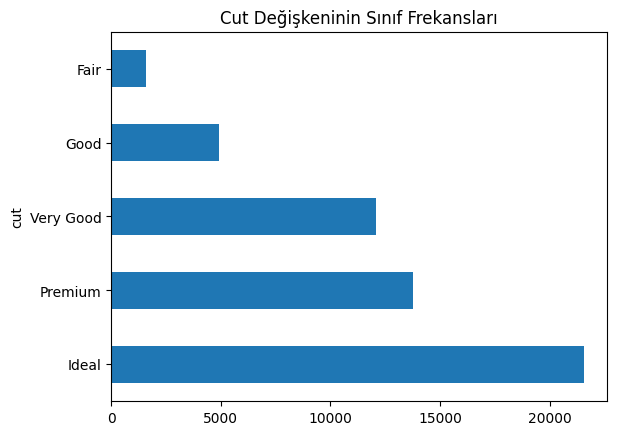

In [100]:
# Üstteki gibi uzayıp giden değerleri şu şekilde de yazabiliriz.
(df["cut"]
.value_counts()
.plot.barh()
.set_title("Cut Değişkeninin Sınıf Frekansları"))


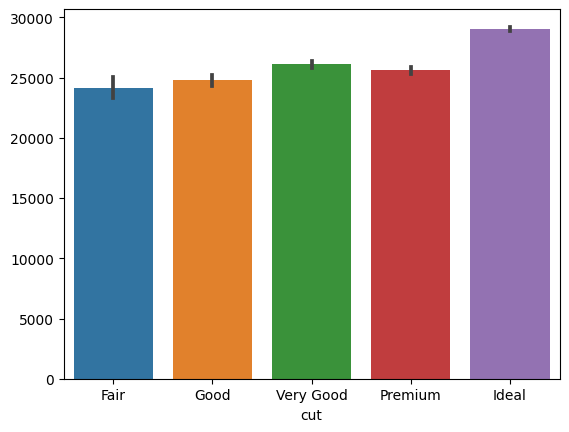

In [101]:
# Seaborn ile sütun  grafiği çizme
import seaborn as sns
a = sns.barplot(x="cut" , y=df.cut.index , data=df)

# Sütun Grafik Çaprazlamalar 


Çaprazlama, veri seti içinde yer alan değişkenlerin birlikte değerlendirilmesidir.
Burada artık grafiklerin teknik özelliklerinin yanında veriye değil de bilgiye erişmek için kullanacak olduğumuz yaklaşımlar olacak.

In [103]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_kategoriler = ["Fair" , "Good" , "Very Good" , "Premium" , "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(ordered=True , categories=cut_kategoriler))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


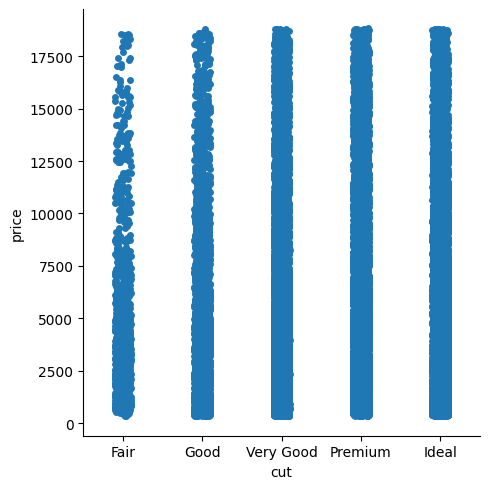

In [104]:
sns.catplot(x="cut" , y="price" , data=df)

<Axes: xlabel='cut', ylabel='price'>

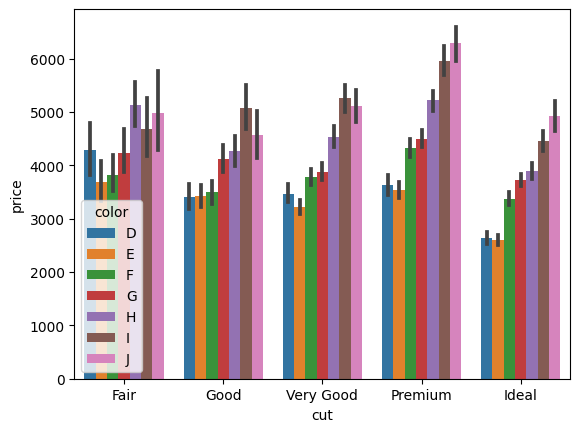

In [7]:
# Bu grafiğe "hue" ile bir boyut daha ekledik. Bu sayede örneğin üstteki tabloyu oluşturan ek değerlere de ulaştık. Yani daha fazla açıklanabilirlik elde ettik.

sns.barplot(x="cut" , y="price" , hue="color" , data=df)

Üzerindeki çubuklar standart sapma değerleri, burada gördüğümüz price eksenindeki değerler iki kategorik değişken bir arada bulunduğunda iki groubby işlemi sonrası price değişkeninin ortalaması
Peki bunu nasıl doğrularız? Bir alt kodda:

In [111]:
df.groupby(["cut" , "color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

# Histogram ve Yoğunluk Grafiğinin Oluşturulması 


Sayısal değişkenler için kullanılan, sayısal değişkenlerin dağılımını ifade etmek için kullanılan grafiktir. -> distplot()

In [112]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


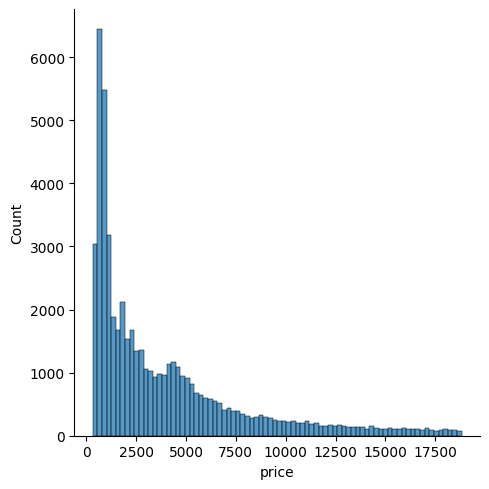

In [114]:
sns.displot(df.price , kde=False)   # "kde" değerimiz yoğunluk eğrimizi gösterir. Default olarak True'dur.

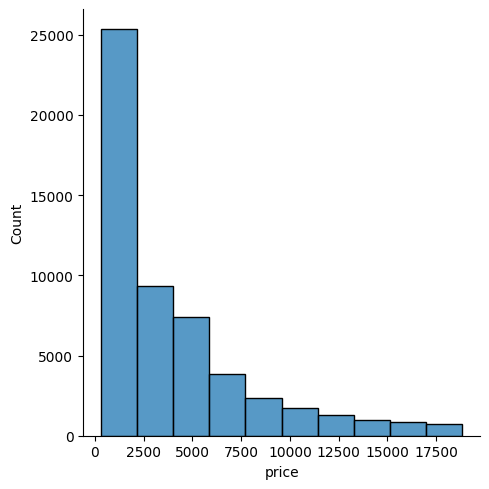

In [115]:
sns.displot(df.price , bins=10 , kde=False)      # "bins" değeri kaç taneyse grafik o kadar sütundan oluşturulmaya çalışılır.

C:\Users\Bedirhan Örseloğlu\AppData\Local\Temp\ipykernel_18540\2239777731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


<Axes: xlabel='price', ylabel='Density'>

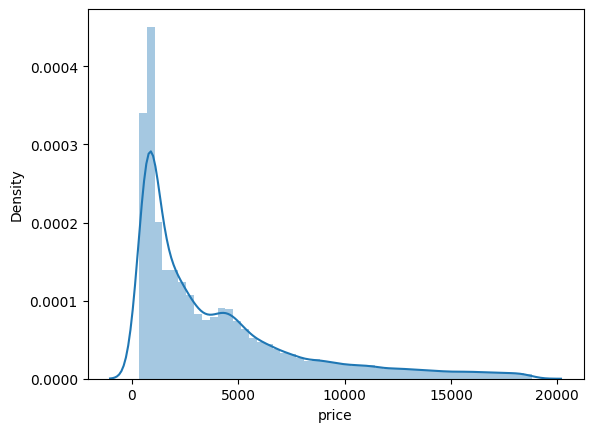

In [119]:
sns.distplot(df.price)

C:\Users\Bedirhan Örseloğlu\AppData\Local\Temp\ipykernel_18540\19284258.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price , hist=False)


<Axes: xlabel='price', ylabel='Density'>

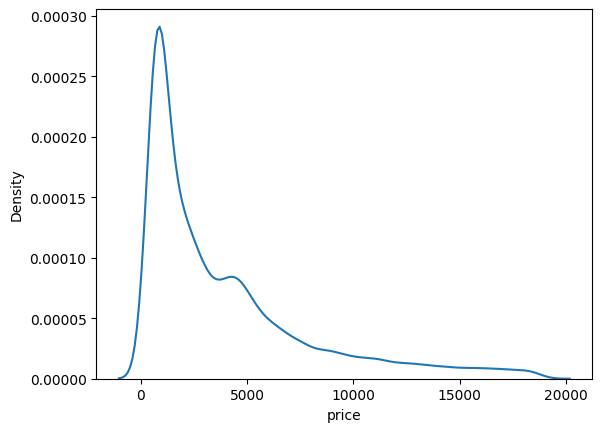

In [121]:
sns.distplot(df.price , hist=False)     # Sadece yoğunluk grafiği gösterildi.

C:\Users\Bedirhan Örseloğlu\AppData\Local\Temp\ipykernel_18540\2431804193.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.price , shade=True)


<Axes: xlabel='price', ylabel='Density'>

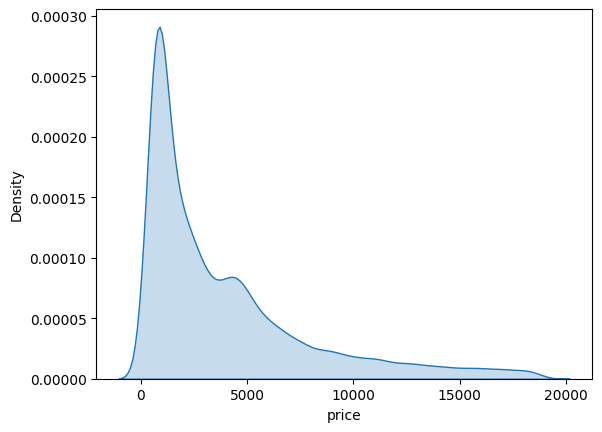

In [122]:
# Yoğunluk grafiğinin altını boyadık. -> kdeplot()
sns.kdeplot(df.price , shade=True)

# Histogram ve Yoğunluk Çaprazlamalar 

Çaprazlama, veri seti içinde yer alan değişkenlerin birlikte değerlendirilmesidir.


In [123]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Bir üstteki grafik üzerinden yorum yapmamız yanıltıcı olacaktır. Bu mavi alanı oluşturan ne? 

" sns.FacetGrid(df , hue="cut" , height=5 ,  xlim=(0,10000)).map(sns.kdeplot , price , shade=True).add_legend() "  kodunun aynısı alttaki     
    # FacetGrid -> grafik üzerine eklenen boyutları bölerek göstermek için kullanılır.
    # map -> Yine yoğunluk haritası oluşturmak istiyoruz ama boyut ekleyerek(cut değişkenini). Dolayısıyla FacetGrid'le cut boyutunu oluşturarak map ile bunu çaprazlıyoruz(birleştirme).
    # add_legend() -> üstüne eklediğimi cut kategorik değişkeninin bilgilerini eklemek için kullandık (sağda gözüken bilgiler cut - ideal, premium, very good ...)

C:\Users\Bedirhan Örseloğlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Bedirhan Örseloğlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Bedirhan Örseloğlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

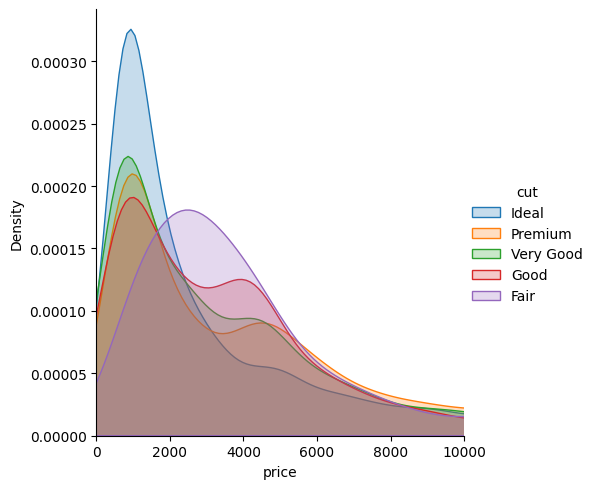

In [127]:
(sns
 .FacetGrid(df,                
            hue="cut",
            height=5,
            xlim=(0,10000))
 .map(sns.kdeplot , "price" , shade=True)
 .add_legend())      

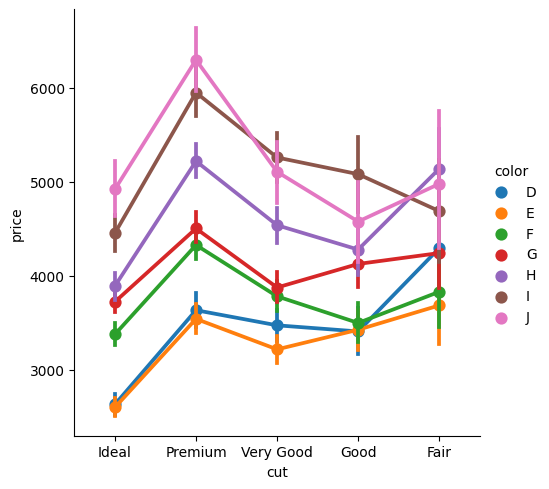

In [128]:
sns.catplot(x="cut" , y="price" , hue="color" , kind="point" , data=df)

    Üstte: 
Örneğin ideal'de color'ların birbirlerinden farklı renkte ve çok uzak değerler alıyor olması color aracılığıyla cut değişkeni sınıfları kesişimlerinde bir bilgi taşındığı anlamına geliyor.
Aynı yerdeki D ve E color'ları için bu geçerli değil mesela çünkü birbirlerine yakın değerler almışlar (y-ekseninde)
Yani D ve E color'ları için -> cut'ın ideal sınıfları için color'ın bu iki sınıf için taşıdığı bilgi birbiriyle çok yakın.
Burada aslında makine öğrenmesinde arkada gerçekleşen yapıyı biz oluşturduk.

# KUTU GRAFİK (Box Plot) 

Kutu grafik de histogram gibi sürekli (sayısal) değişkenleri görselleştirmek için kullandığımız bir grafik türü.

In [1]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [3]:
# Kategorik değişkenlerini inceleyelim.

df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [4]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [5]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [6]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

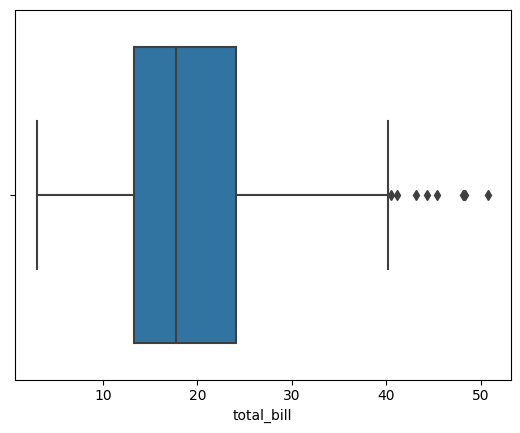

In [16]:
# Kutu Grafiğinin Oluşturulması

sns.boxplot(x = df["total_bill"]);

En soldaki çizgi min değeri
Bir sonraki çizgi (mavinin en solundaki çizgi) %25 değeri 
Bir sonraki çizgi (mavinin ortasındaki çizgi) medyan değeri (%50 değeri)
Bir sonraki çizgi (mavinin en sağındaki çizgi) %75 değeri
En sağdaki nokta max değeri
Diğer noktalar ise "aykırı değerler"

Kutu Grafik Çaprazlamalar 


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


<Axes: xlabel='day', ylabel='total_bill'>

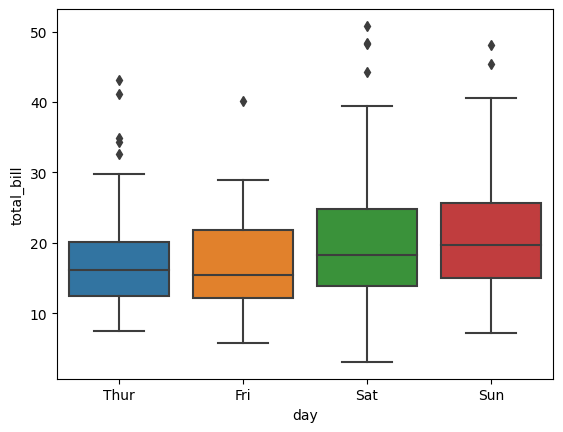

In [23]:
# Keşfetmek istediğimiz soru şu : "Hangi günler daha fazla para kazanıyoruz?"

sns.boxplot(x="day" , y="total_bill" , data = df)

<Axes: xlabel='time', ylabel='total_bill'>

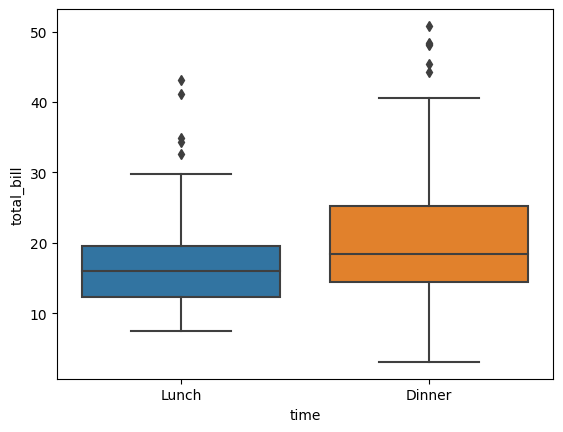

In [25]:
# Keşfetmek istediğimiz soru şu : "Sabah mı akşam mı daha çok para kazanıyoruz?"

sns.boxplot(x="time" , y="total_bill" , data=df)


In [ ]:
# Bu grafikleri incelediğimizde en iyi garsonlarımızı pazar gününün akşamına koymayı kararlaştırabiliriz.

<Axes: xlabel='size', ylabel='total_bill'>

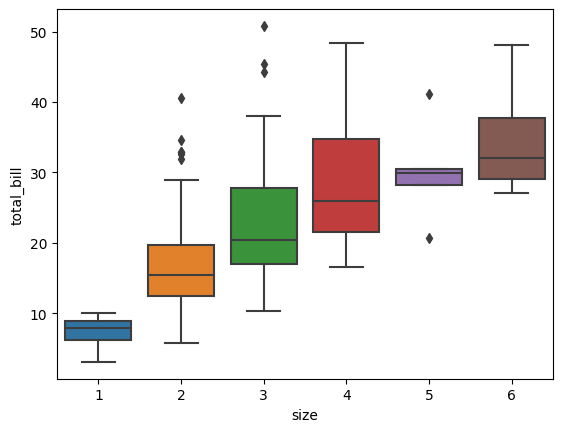

In [26]:
# Keşfetmek istediğimiz soru şu : "Gelen grupların kişi sayısıyla kazanç doğru orantılı mı?"
# - Evet doğru orantılı çıktı.

sns.boxplot(x="size" , y="total_bill" , data=df)

<Axes: xlabel='day', ylabel='total_bill'>

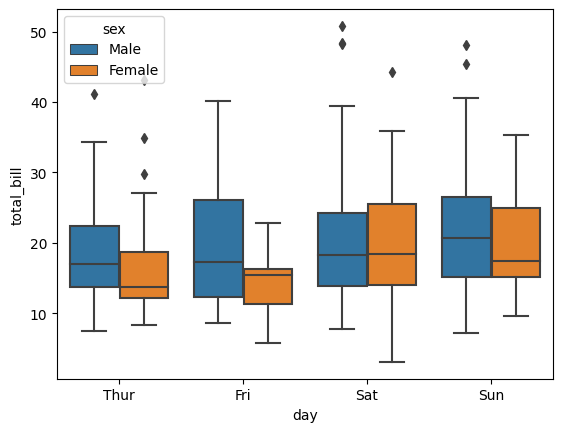

In [27]:
# Keşfetmek istediğimiz soru şu : "Hangi cinsiyet hangi gün ne kadar para ödüyor?"

sns.boxplot(x="day" , y="total_bill" , hue="sex" , data=df)

# VİOLİN GRAFİK

Boxplot'a benzerdir. Yoğunluk grafiği ile kutu grafiğinin kesişimi gibi düşünebiliriz.

In [28]:
sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


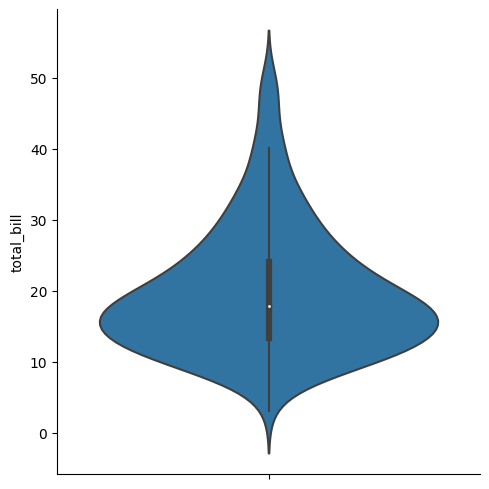

In [29]:
sns.catplot(y="total_bill" , kind="violin" , data=df)

In [ ]:
# Violin Grafiği Çaprazlamalar

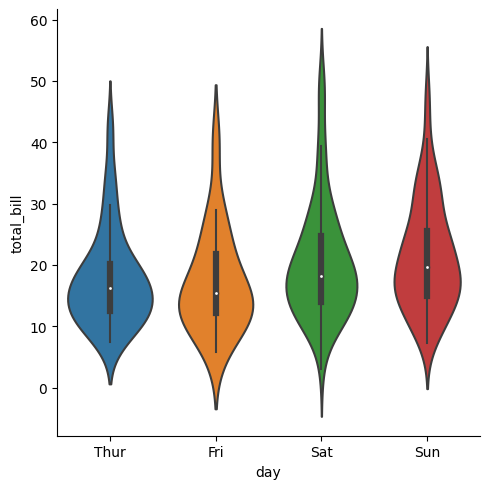

In [30]:
sns.catplot(x="day" , y="total_bill" , kind="violin" , data=df)

# KORELASYON (İLİŞKİ) GRAFİKLERİ

Korelasyon = Değişkenler arasındaki ilişkiyi temsil eden istatistiksel bir terimdir.
İki sayısal değişken arasındaki ilişkiyi ifade etmek için kullanılan ve en çok bilinen metot "scatterplot"tır (yaklaşım , saçılım).

In [31]:
import seaborn as sns
tips = sns. load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

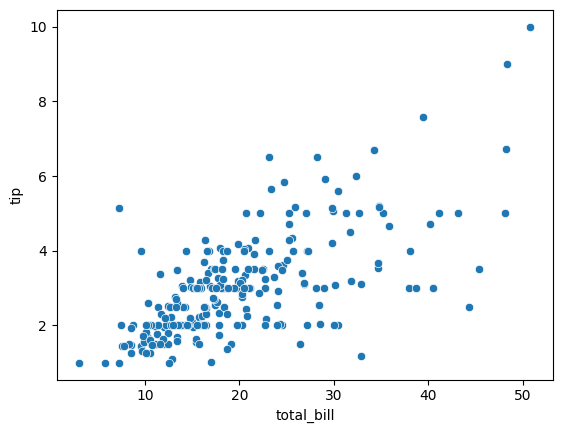

In [32]:
sns.scatterplot(x="total_bill" , y="tip" , data=df)

In [ ]:
# Korelasyon Grafiği Çaprazlama

<Axes: xlabel='total_bill', ylabel='tip'>

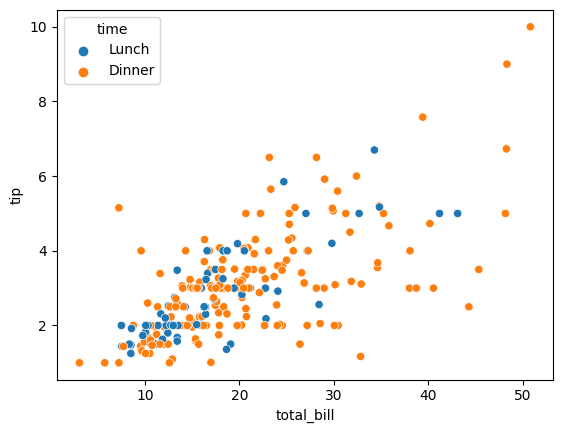

In [33]:
sns.scatterplot(x="total_bill" , y="tip" , hue="time" , data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

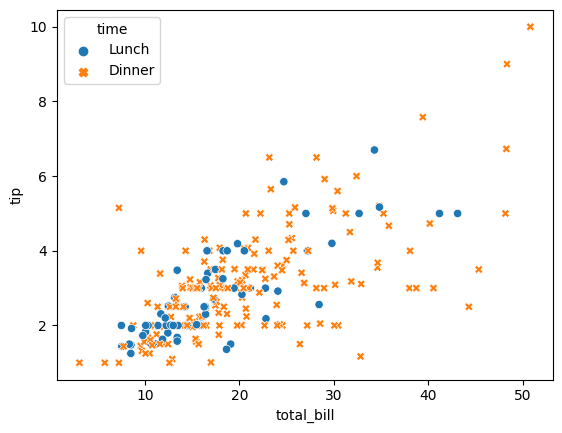

In [34]:
# Time değişkeninin nokta tipini değiştirmek istersek

sns.scatterplot(x="total_bill" , y="tip" , hue="time" , style="time" ,  data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

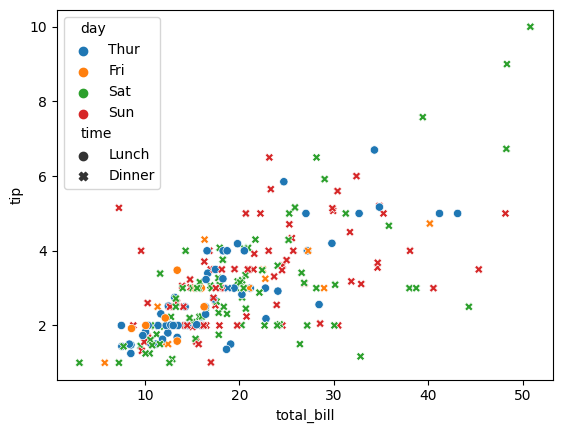

In [35]:
sns.scatterplot(x="total_bill" , y="tip" , hue="day" , style="time" ,  data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

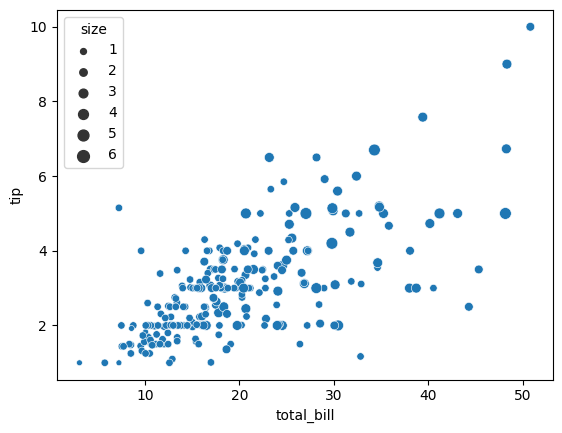

In [36]:
# Sürekli (Sayısal) değişkeni boyut olarak eklemek istersek

sns.scatterplot(x="total_bill" , y="tip" , size="size" ,  data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

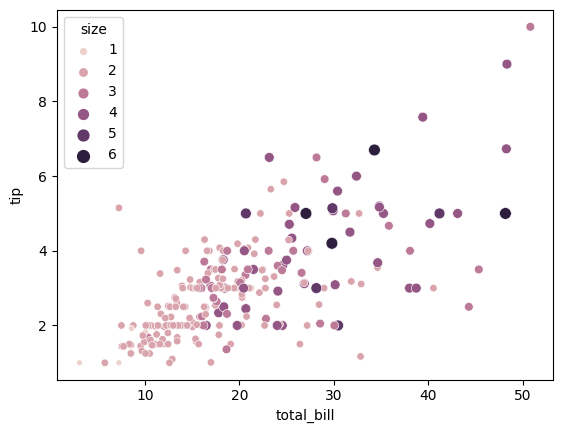

In [37]:
# Buna bir renklendirme yapmak istersek size'ı hue ile birlikte de ekleyebiliriz.

sns.scatterplot(x="total_bill" , y="tip" , hue="size" , size="size" ,  data=df)

In [ ]:
# Doğrusal İlişkinin Gösterilmesi 

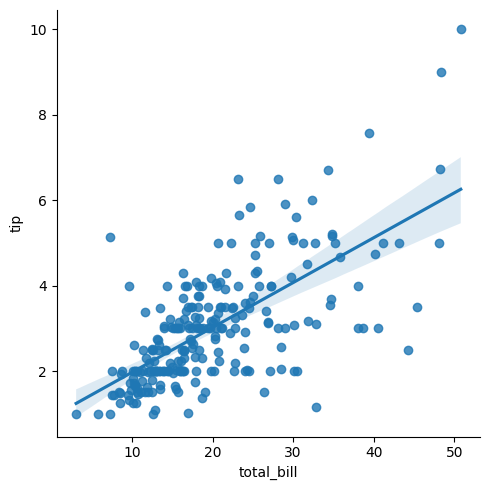

In [43]:
import seaborn as sns 
import matplotlib.pyplot as plt

tips = sns. load_dataset("tips")
df = tips.copy()
df.head()

sns.lmplot(x="total_bill" , y="tip" , data=df)        # lmplot = lineer model'in kısaltması. Doğursal bir model oluşturacapımız için.

# Doğrunun etrafındaki açık mavilik sapmayı ifade ediyor.


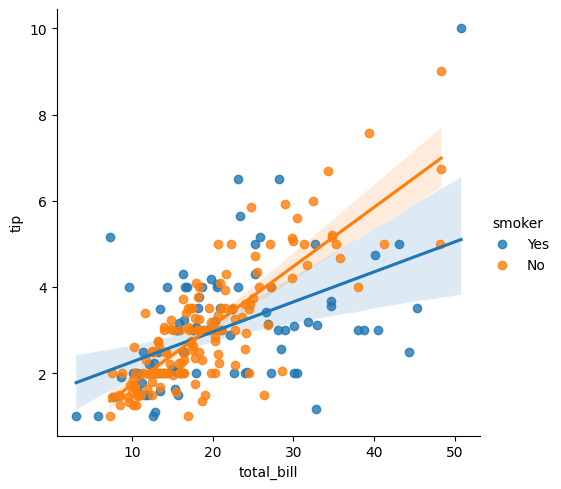

In [45]:
sns.lmplot(x="total_bill" , y="tip" , hue="smoker" , data=df)

# Alttaki grafiği incelediğimizde üsttemi mavi doğru ile alttaki mavi doğrunun eğiminin aynı olmadığını görüyoruz (eğim azalmış).
# Sigara içmeyenler için aynı üstteki gibi hesap arttıkça bahşiş artıyor diyebiliriz. Ama doğrunun eğiminin azaldığınu göz önüne alırsak sigara içenler için bu yorumun doğru olmadığını görürüz.

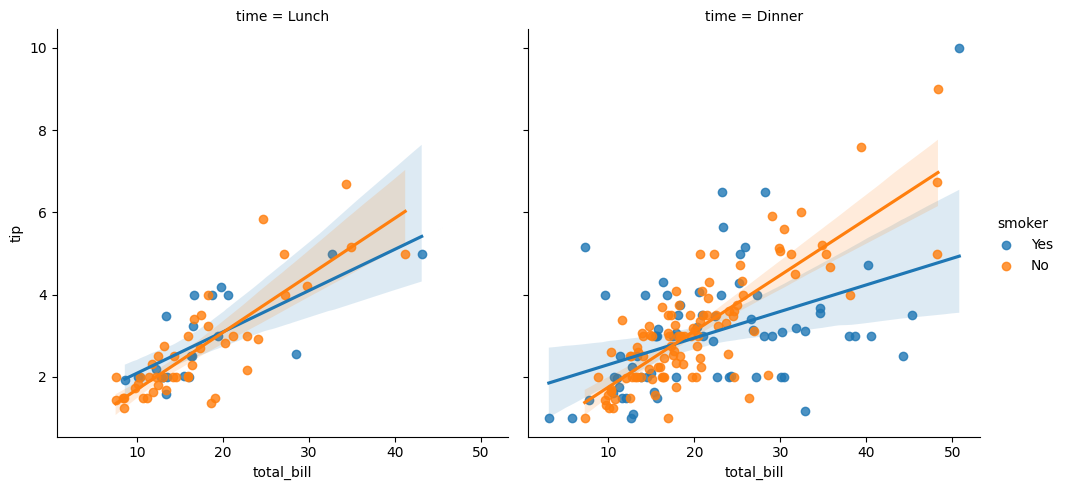

In [46]:
# col argümanına göre iki farklı grafik oluşturdu. Daha fazla çaprazlama yapma ve analiz etme şansı elde ediyoruz.

sns.lmplot(x="total_bill" , y="tip" , hue="smoker" , col="time" , data=df)

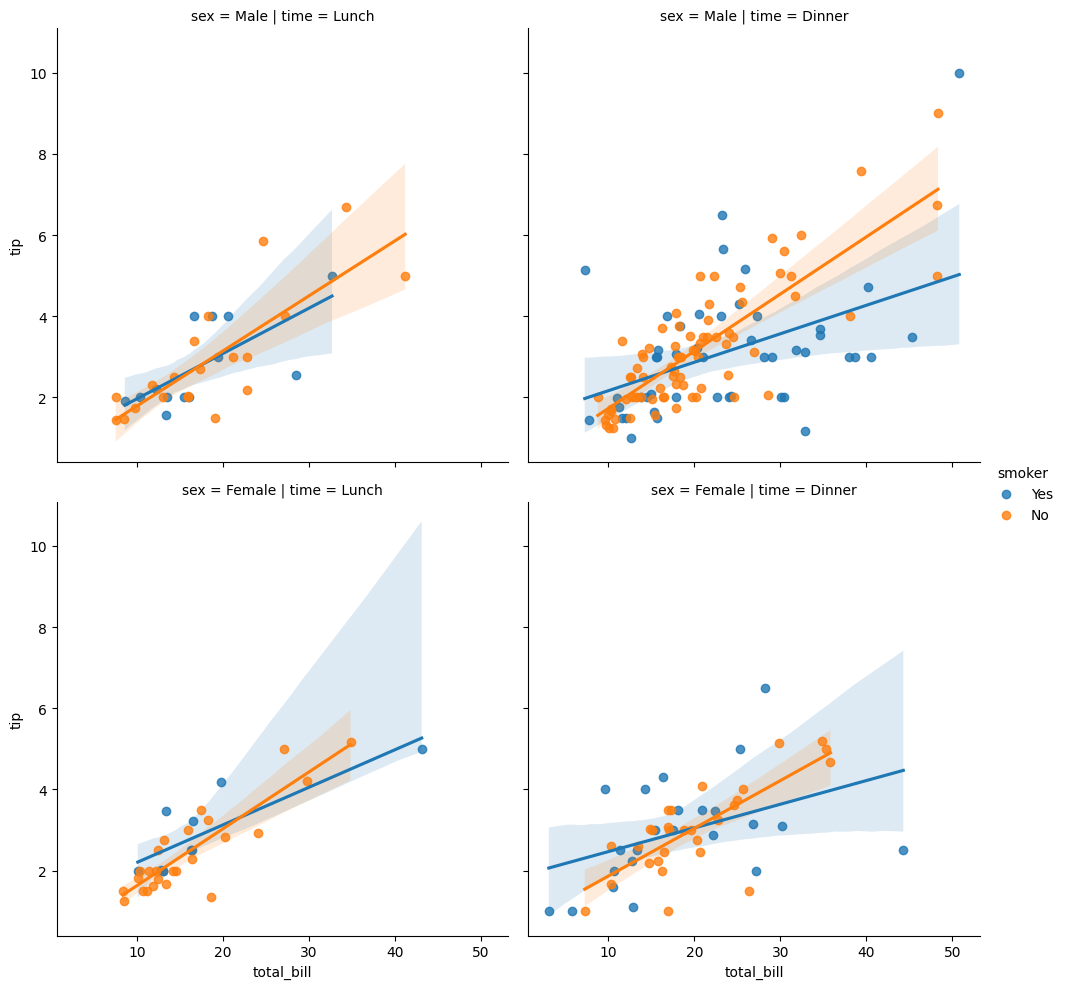

In [47]:
# row argümanını da ekleyerek dört farklı grafik oluşturduk. Daha fazla çaprazlama yapma ve analiz etme şansı elde ediyoruz.

sns.lmplot(x="total_bill" , y="tip" , hue="smoker" , col="time" , row="sex" , data=df)

# Scatter Plot Matrisi 

In [48]:
import seaborn as sns
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [50]:
df.shape

(150, 5)

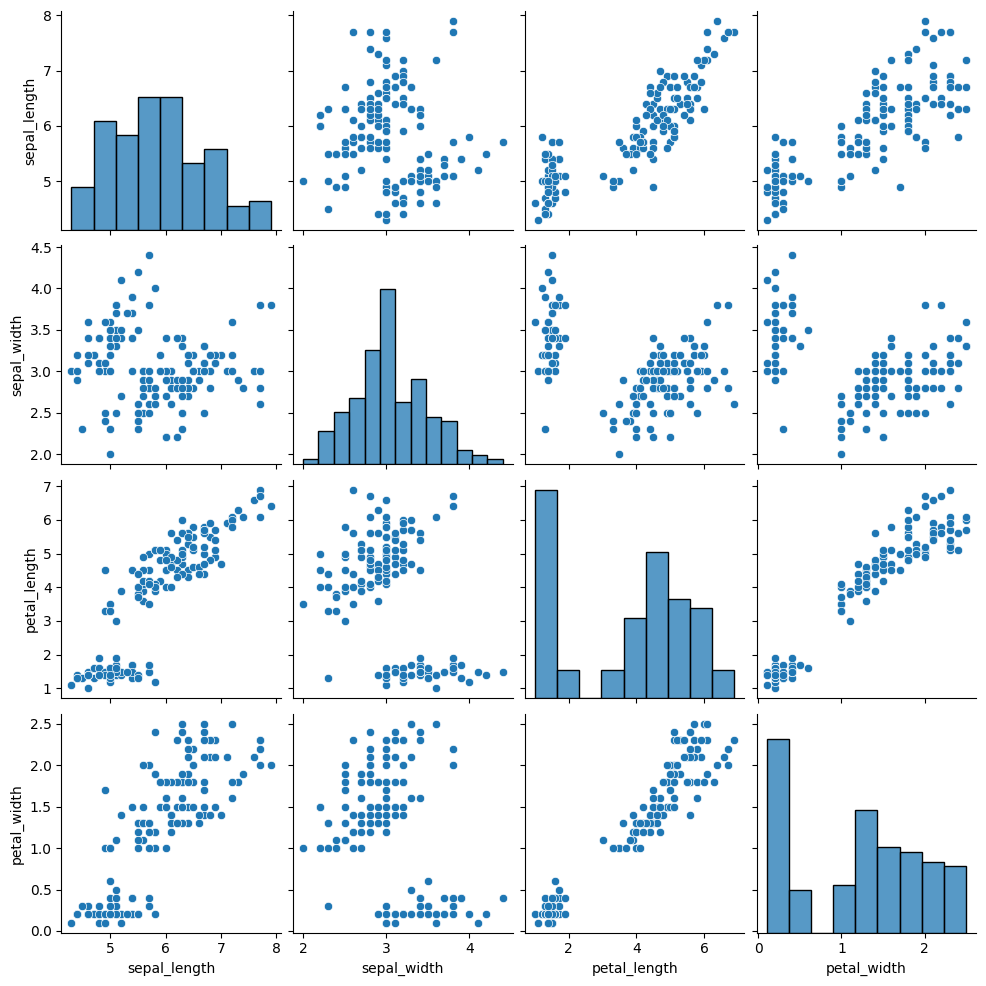

In [52]:
# pairplot ile birlikte her bir değişkenin her bir değişkenle ilişkisini gözlemleyebiliyoruz.

sns.pairplot(df) 

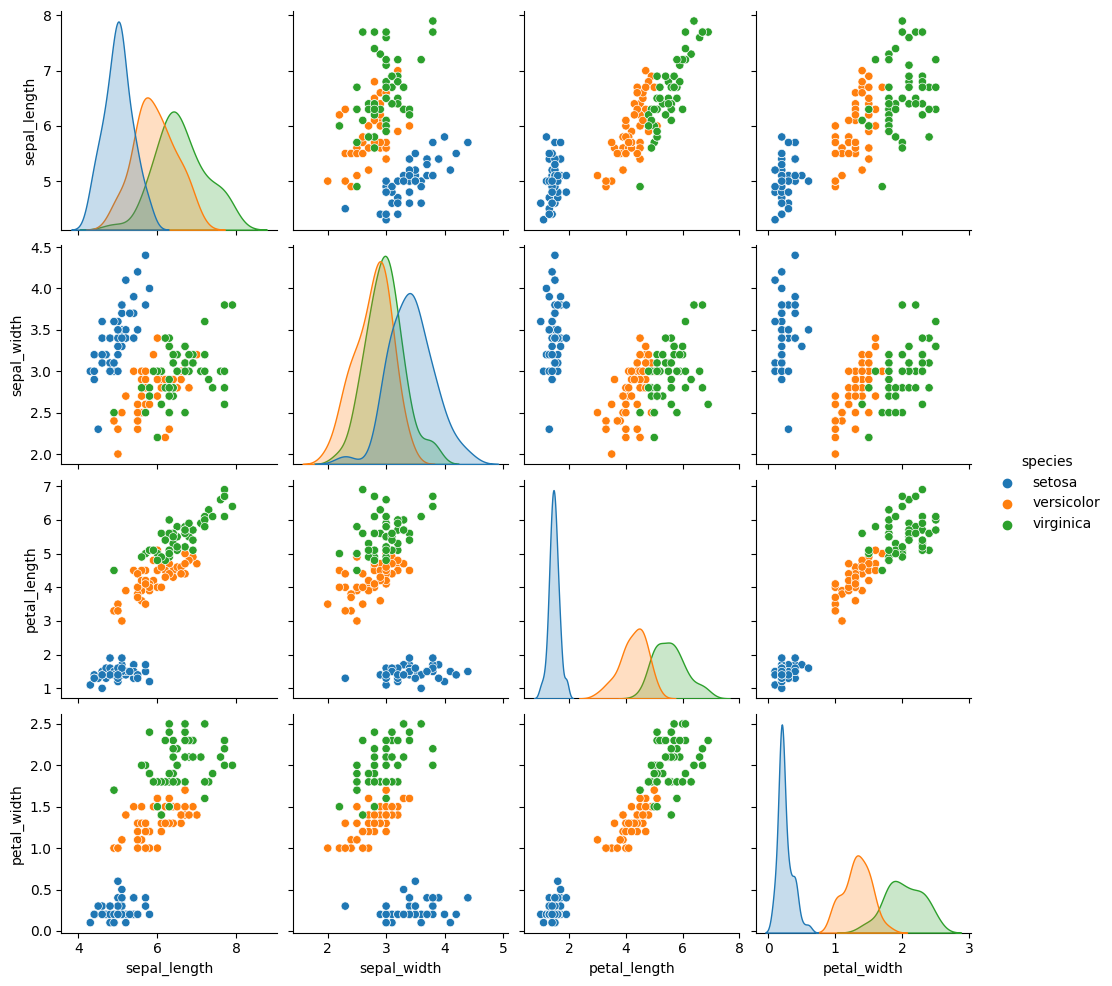

In [53]:
sns.pairplot(df , hue="species")

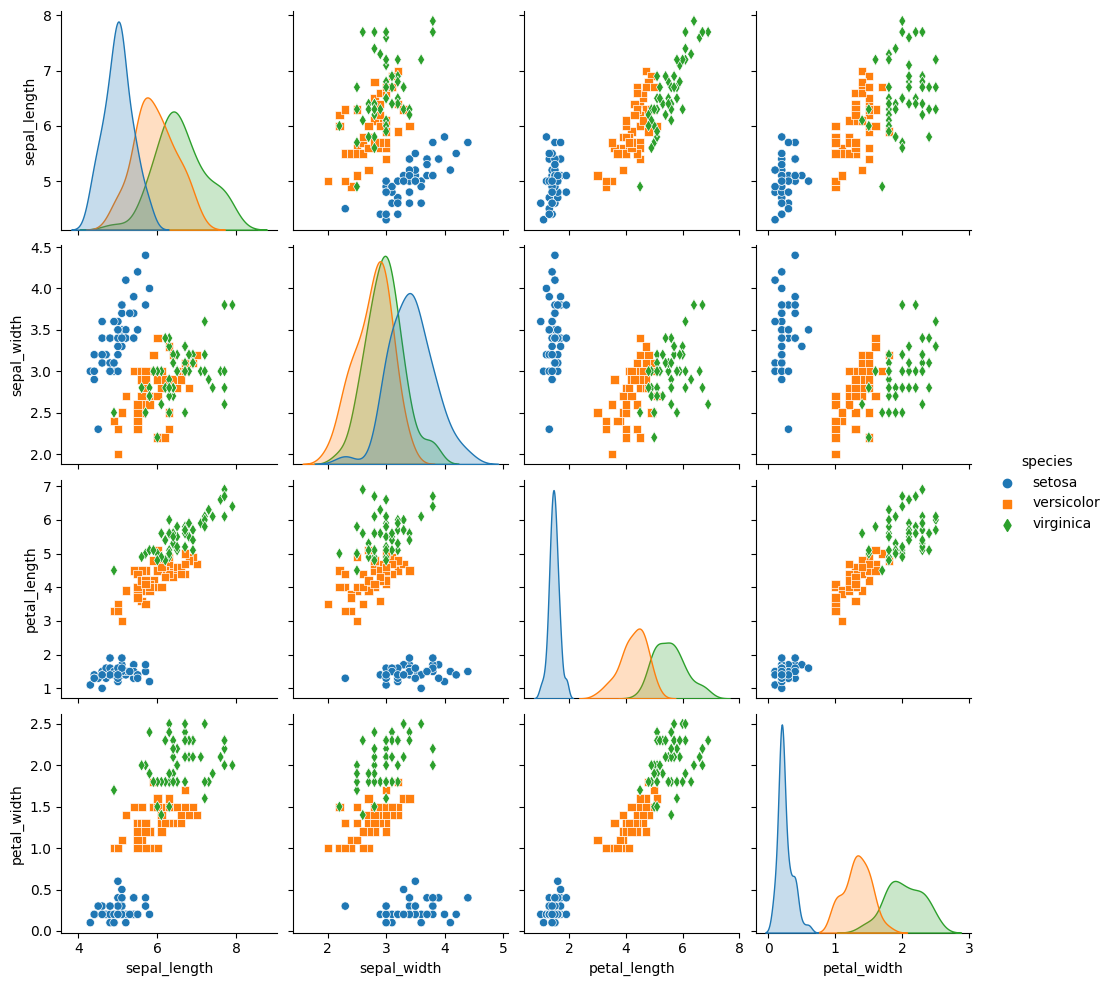

In [54]:
# İşaretleme şekillerini değiştirdik. -> markers özelliği

sns.pairplot(df , hue="species" , markers=["o" , "s" , "d"])

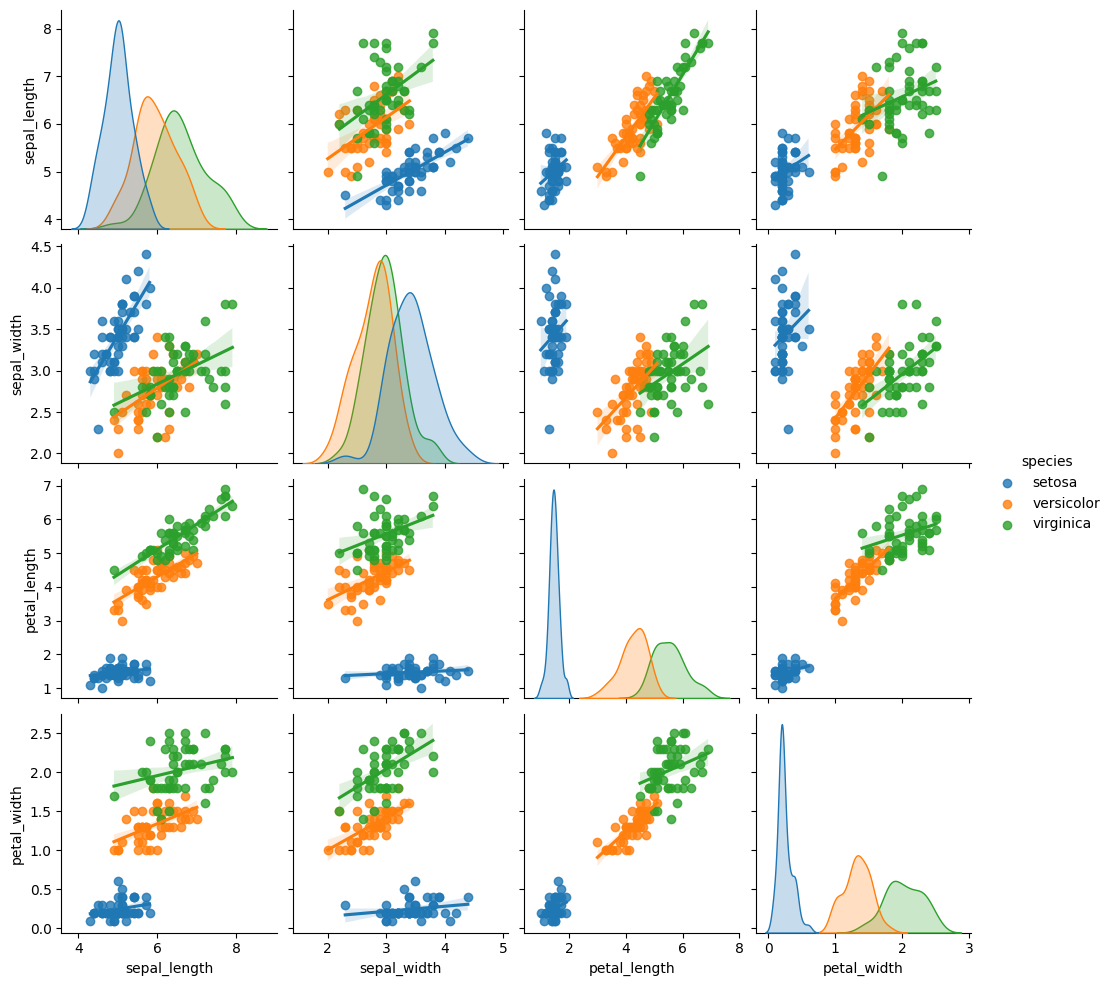

In [56]:
# Grafiklere doğru ekledik.

sns.pairplot(df , hue="species" , kind="reg")

# ISI HARİTASİ (HEAT MAP) 

In [57]:
import seaborn as sns
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [58]:
df.shape

(144, 3)

In [14]:
# Isı haritası oluşturmadan önce pivot table ile verileri daha okunaklı bir hale getirmeliyiz.

df = df.pivot_table("passengers" , index="month" , columns="year")
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

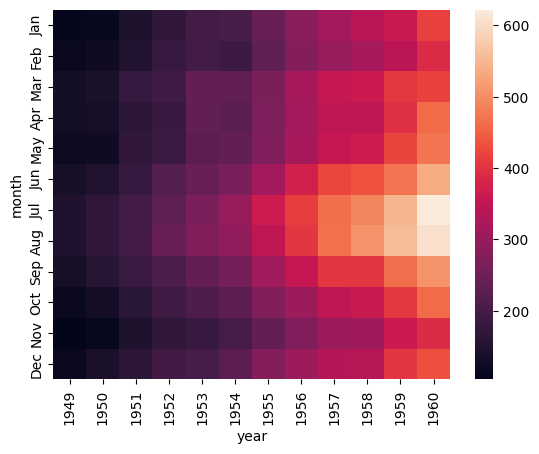

In [73]:
# Isı haritasını şimdi oluşturabiliriz.

sns.heatmap(df)

<Axes: xlabel='year', ylabel='month'>

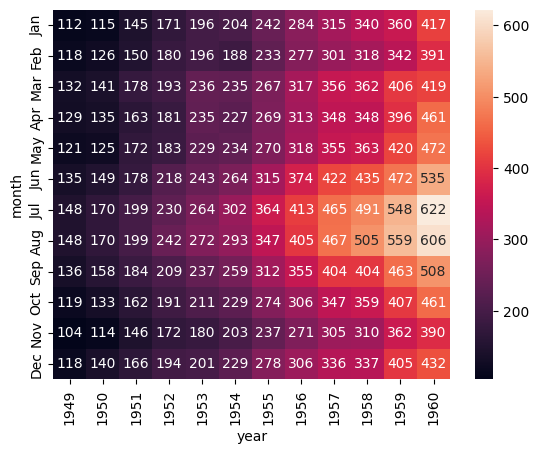

In [74]:
# Hücreleri kendi değerleriyle doldurduk.

sns.heatmap(df , annot=True , fmt="d")

<Axes: xlabel='year', ylabel='month'>

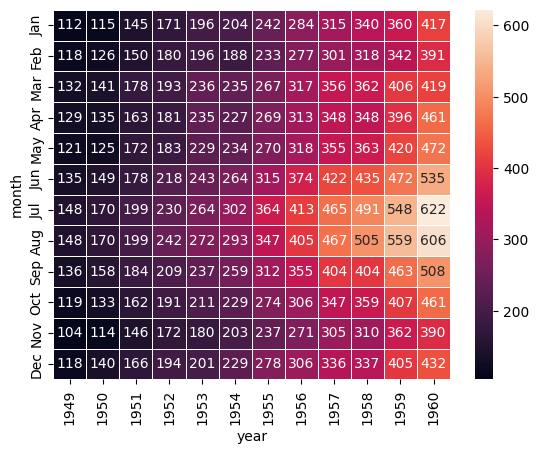

In [78]:
# Hücrelerin arasına çizgi ekledik.

sns.heatmap(df , annot=True , fmt="d" , linewidths=.7)

# ÇİZGİ GRAFİĞİ 

In [80]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [81]:
df.shape

(1064, 5)

In [82]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [84]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [85]:
# Herbir zaman noktasında eşit sayıda sinyal mi var ?

df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [88]:
df.groupby("signal")["timepoint"].count()

signal
-0.255486    1
-0.238474    1
-0.224351    1
-0.181241    1
-0.178510    1
            ..
 0.455575    1
 0.460896    1
 0.476055    1
 0.494787    1
 0.564985    1
Name: timepoint, Length: 1064, dtype: int64

In [89]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


In [ ]:
# Çizgi Grafiğinin Oluşturulması -> lineplot()

<Axes: xlabel='timepoint', ylabel='signal'>

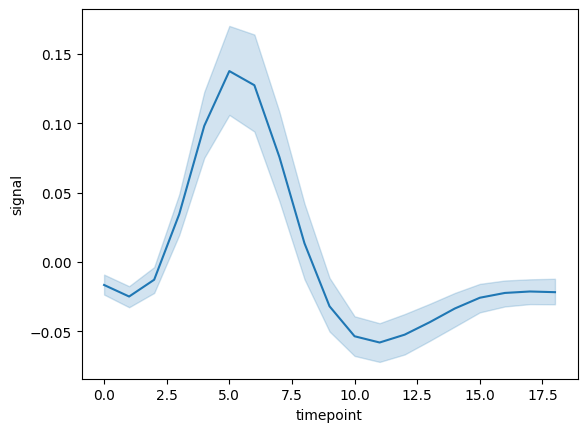

In [90]:
sns.lineplot(x="timepoint" , y="signal" , data=df)

# Ana çizgimiz ortalama değerler , etrafındaki soluk olanlar ise standart sapmalar 

In [ ]:
# Çizgi Grafiği Çaprazlama

<Axes: xlabel='timepoint', ylabel='signal'>

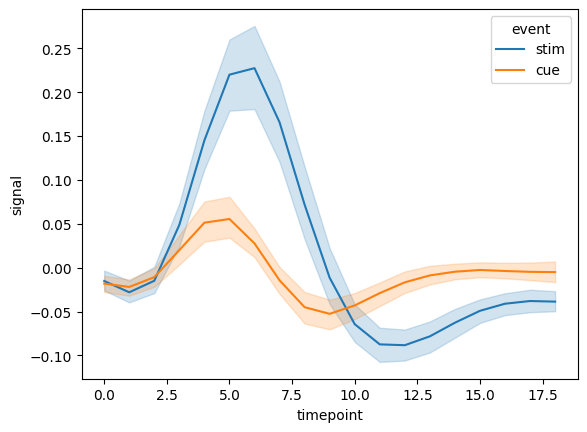

In [92]:
sns.lineplot(x="timepoint" , y="signal" , hue="event" , data=df)

<Axes: xlabel='timepoint', ylabel='signal'>

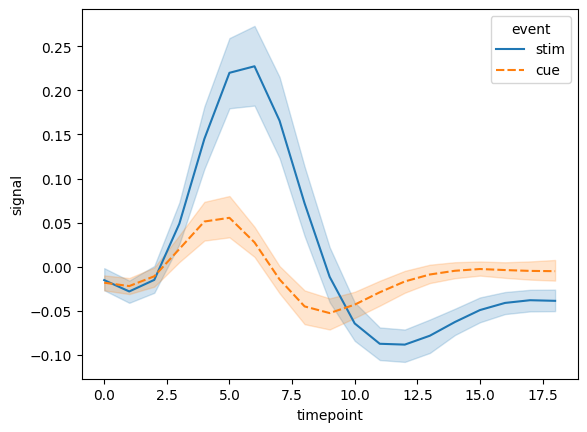

In [93]:
sns.lineplot(x="timepoint" , y="signal" , hue="event" , style="event" , data=df)

<Axes: xlabel='timepoint', ylabel='signal'>

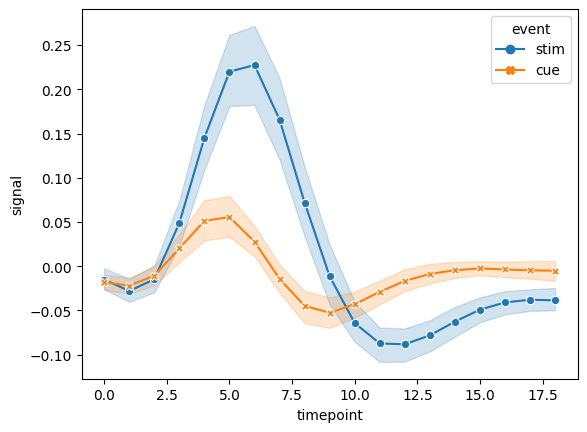

In [94]:
# Ortalama değerleri işaretledik.

sns.lineplot(x="timepoint" , y="signal" , hue="event" , style="event" , markers=True , dashes=False , data=df)

<Axes: xlabel='timepoint', ylabel='signal'>

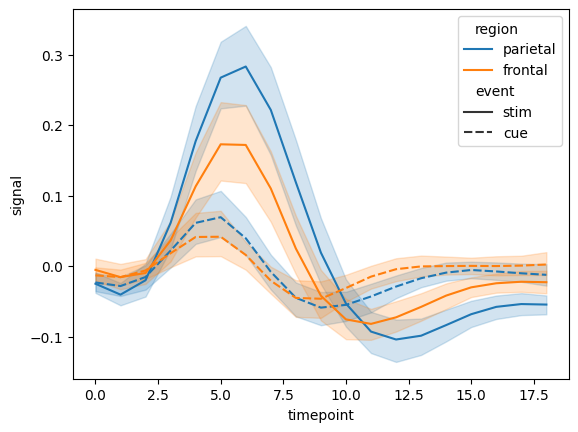

In [95]:
sns.lineplot(x="timepoint" , y="signal" , hue="region" , style="event" , data=df)

# BASİT ZAMAN SERİSİ GRAFİĞİ 

In [6]:
import pandas_datareader as pr

# Apple hisse senedi verileri

df = pr.get_data_yahoo("APPL")
df.head()

TypeError: string indices must be integers, not 'str'